<a href="https://colab.research.google.com/github/Siddharth131020/Machine-learning/blob/main/CNN_tensor_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from keras import layers

In [2]:
num_classes =10
(train_set_x, train_set_y), (test_set_x, test_set_y) = keras.datasets.mnist.load_data()

In [3]:
print(train_set_x.shape, train_set_y.shape, test_set_x.shape, test_set_y.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [4]:
test_img = train_set_x[200]
print(test_img.shape)

(28, 28)


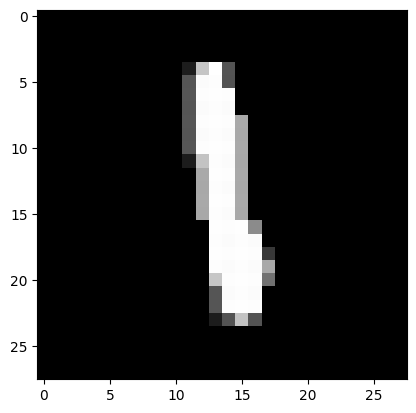

1


In [5]:
plt.imshow(test_img, cmap='gray')
plt.show()
print(train_set_y[200])

In [6]:
test_img.max()

255

In [7]:
train_set_x = train_set_x.astype('float32')/255
test_set_x = test_set_x.astype('float32')/255


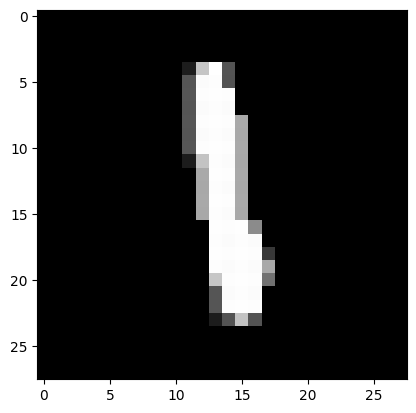

In [8]:
plt.imshow(train_set_x[200], cmap='gray')


In [9]:
train_set_x = np.expand_dims(train_set_x, -1)
test_set_x = np.expand_dims(test_set_x, -1)

In [10]:
print(train_set_x.shape, test_set_x.shape)


(60000, 28, 28, 1) (10000, 28, 28, 1)


In [11]:
train_set_y[30]

3

In [12]:
train_set_y = keras.utils.to_categorical(train_set_y, num_classes)
test_set_y = keras.utils.to_categorical(test_set_y, num_classes)

In [13]:
train_set_y[30]


array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [14]:
input_shape =  (28, 28, 1)


In [15]:
model = keras.Sequential(
    [
    keras.Input(shape = input_shape),
    layers.Conv2D(32, kernel_size = (3, 3), activation = 'relu'),
    layers.MaxPool2D(pool_size = (2, 2), strides=(1, 1)),
    layers.Conv2D(64, kernel_size = (3, 3), activation = 'relu'),
    layers.MaxPool2D(pool_size = (2, 2)),
    layers.Flatten(),
    layers.Dense(500, activation = 'relu'),
    layers.Dense(num_classes, activation = 'softmax')
    ]
)

In [16]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 7744)              0         
                                                                 
 dense (Dense)               (None, 500)               3

In [17]:
batch = 50
epoch = 10

In [18]:
model.compile(optimizer = 'Adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics = ['accuracy'])


In [19]:
hist = model.fit(train_set_x, train_set_y, epochs=epoch, batch_size=batch, validation_split=0.1)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1080/1080 [==============================] - 130s 120ms/step - loss: 0.0253 - accuracy: 0.9636 - val_loss: 0.0083 - val_accuracy: 0.9897
Epoch 2/10
1080/1080 [==============================] - 126s 117ms/step - loss: 0.0072 - accuracy: 0.9901 - val_loss: 0.0073 - val_accuracy: 0.9888
Epoch 3/10
1080/1080 [==============================] - 125s 115ms/step - loss: 0.0044 - accuracy: 0.9944 - val_loss: 0.0075 - val_accuracy: 0.9893
Epoch 4/10
1080/1080 [==============================] - 127s 118ms/step - loss: 0.0032 - accuracy: 0.9959 - val_loss: 0.0060 - val_accuracy: 0.9928
Epoch 5/10
1080/1080 [==============================] - 125s 115ms/step - loss: 0.0021 - accuracy: 0.9975 - val_loss: 0.0073 - val_accuracy: 0.9920
Epoch 6/10
1080/1080 [==============================] - 126s 116ms/step - loss: 0.0015 - accuracy: 0.9985 - val_loss: 0.0070 - val_accuracy: 0.9933
Epoch 7/10
1080/1080 [==============================] - 125s 116ms/step - loss: 0.0012 - accuracy: 0.9988 - val_loss: 0.006

In [20]:
score = model.evaluate(test_set_x, test_set_y, batch_size=512)


20/20 [==============================] - 7s 357ms/step - loss: 0.0084 - accuracy: 0.9904


In [21]:
predictions = model.predict(test_set_x)


313/313 [==============================] - 6s 19ms/step


In [22]:
print(np.argmax(predictions[0]))


7


In [23]:
predictions.shape


(10000, 10)

In [24]:
for i in predictions:
    print(np.argmax(i), i)

Streaming output truncated to the last 5000 lines.
 3.8286145e-29 5.0850986e-33 1.7888139e-33 9.9999994e-01 1.8652530e-32]
9 [1.5874354e-23 2.8737613e-23 3.3824796e-22 1.6340225e-19 3.5375171e-20
 2.6084386e-22 1.2399557e-24 3.5911400e-21 2.0767503e-15 9.9999994e-01]
2 [3.92369523e-32 8.20223929e-32 9.99999940e-01 8.12552058e-28
 2.91931132e-27 1.11798219e-32 1.31193457e-31 1.22191036e-32
 1.76302293e-26 7.19609953e-34]
1 [1.0569630e-17 9.9999994e-01 1.4864451e-18 1.8613205e-19 7.7311780e-15
 3.8624201e-14 4.6487689e-14 1.9764002e-17 2.9873978e-14 2.7962691e-11]
2 [9.2461507e-14 1.0028252e-18 9.9999994e-01 1.7090209e-12 2.0858131e-19
 4.2973722e-23 1.5657435e-14 6.6668522e-23 2.7966070e-17 1.1664019e-21]
1 [1.4479841e-19 9.9999994e-01 7.1762559e-18 7.4304502e-19 4.5657580e-16
 4.5979379e-15 8.9620313e-15 5.3466089e-18 1.9356333e-15 2.7542784e-14]
3 [1.1369190e-31 2.7142427e-21 2.3111882e-28 9.9999994e-01 7.8387780e-28
 3.9243177e-20 5.9710367e-26 4.4951259e-24 1.1472846e-22 2.4508771e-

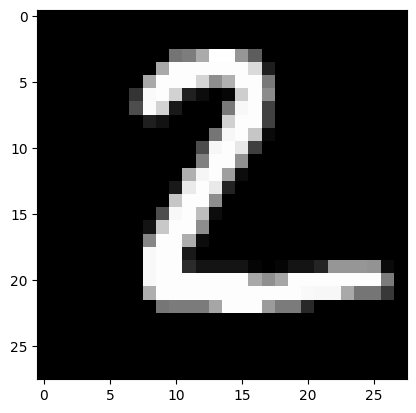

In [25]:
plt.imshow(test_set_x[1], cmap='gray')
